# Dataset Description - Assignment 1

The original data is from [HealthData: Hospital Inpatient Discharges (SPARCS De-Identified)](https://healthdata.gov). The data provided is based on this, with some modifications.

The Statewide Planning and Research Cooperative System (SPARCS) Inpatient De-identified File contains discharge level detail on patient characteristics, diagnoses, treatments, services, and charges.


### Data Fields

| Column   Name                | Attribute/Target | Description                                                                                                                                                                                                  |
|------------------------------|------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ID                           | N/A              | Unique number to represent patient ID                                                                                                                                                                        |
| HealthServiceArea            | N/A              | A description of the Health Service Area (HSA) in which the hospital is located. Capital/Adirondack, Central NY, Finger   Lakes, Hudson Valley, Long Island, New York City, Southern Tier, Western NY.       |
| Gender                       | Attribute 1      | Patient gender:   (M) Male, (F) Female, (U) Unknown.                                                                                                                                                         |
| Race                         | Attribute 2      | Patient race. Black/African American, Multi, Other Race, Unknown, White. Other Race   includes Native Americans and Asian/Pacific Islander.                                                                  |
| TypeOfAdmission              | Attribute 3      | A description of   the manner in which the patient was admitted to the health care facility:   Elective, Emergency, Newborn, Not Available, Trauma, Urgent.                                                  |
| CCSProcedureCode             | Attribute 4      | AHRQ Clinical Classification Software (CCS) ICD-9 Procedure Category Code                                                                                                                                    |
| APRSeverityOfIllnessCode     | Attribute 5      | All Patient  Refined Severity of Illness (APR SOI) Description: Minor (1), Moderate (2),   Major (3), Extreme (4)                                                                                            |
| PaymentTypology              | Attribute 6      | A description of the type of payment for this occurrence.                                                                                                                                                    |
| BirthWeight                  | Attribute 7      | The neonate birth weight in grams; rounded to nearest 100g.                                                                                                                                                  |
| EmergencyDepartmentIndicator | Attribute 8      | Emergency Department Indicator is set based on the submitted revenue codes. If the   record contained an Emergency Department revenue code of 045X, the indicator   is set to "Y", otherwise it will be “N”. |
| AverageCostInCounty          | Attribute 9      | Average hospitalization Cost In County of the patient                                                                                                                                                        |
| AverageChargesInCounty       | Attribute 10     | Average medical Charges In County of the patient                                                                                                                                                             |
| AverageCostInFacility        | Attribute 11     | Average Cost In Facility                                                                                                                                                                                     |
| AverageChargesInFacility     | Attribute 12     | Average Charges In Facility                                                                                                                                                                                  |
| AverageIncomeInZipCode       | Attribute 13     | Average Income In Zip Code                                                                                                                                                                                   |
| LengthOfStay                 | target           | The total number  of patient days at an acute level and/or other than acute care level. Has been transformed to match the task class 0 id LengthOfStay < 4 and class 1 otherwise                           |

## INTRODUCTION

Hospitals are under constant pressure to provide timely patient care while ensuring high resource usage. Although this problem has existed for a long time, the recent COVID-19 pandemic has brought it to the forefront. The ability to predict a patient's length of stay (LOS) as early as possible is extremely useful for hospitals in managing their resources. This is beenficial for the health care centers but it is helpful from a patient's perspective as well. It is provides efficiency and helps in keeping things organised.

We will look at the Hospital Inpatient Discharges dataset from HealthData here. This dataset has 59966 rows and 16 columns. 


## OBJECTIVE

* I will explore  a  Hospital Inpatient Discharges dataset using the appropriate ML techniques and apply them to solve the problem hospitals face by predicting the length of stay of a patient.

* Here we will create a machine learning model to predict if a patient will be discharged from a hospital early or remain for a prolonged period of time, based on several attributes (features) related to patient characteristics, conditions, medications, facilities, hospital costs, and the patient's socioeconomic context.

* I will be developing 3 models here by using the following steps:

1) We will first set our goal and pick up an appropriate evaluation metric depending on our EDA.
2) We will then set up our experiment such as setting up our test/ validation data, visualizers and debuggers to determine bittlenecks such as overfitting, underfitting etc.
3) Defien our default baseline model.
4) Make gradual improvements based on unique observations from your instrumentation, such as collecting new data, modifying hyper-parameters, or changing algorithms.

*  The 3 models I will be developing are:

1) Logistic Regression
2) Decision Trees
3) Random Forest

* This is a supervised ML Task. 

To begin, we'll need to import a few packages that will be used to load and analyse data.

Pandas is a fantastic Python package for data loading. To visualise some of the distributions, we'll use Matplotlib. Numpy is a numerical library with a wide range of matrices and mathematical functions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

We load the hospital inpatient discharges dataset using pandas.
The target column is LengthOfStay and all the other columns are attributes.
Our aim here is to evelop a ML model to predict if a patient will be dis-charged from a hospital early or, will stay in hospital for an extended period, based on several attributes.

In [2]:
df = pd.read_csv('train_data.csv', delimiter=',')

We then examine what has been loaded into the dataframe.
The target column is LengthOfStay and all the other columns are attributes.

In [3]:
df

,ID,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,1,New York City,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,2,New York City,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,3,New York City,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,4,New York City,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,5,New York City,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59961,59962,Western NY,M,Black/African American,Newborn,115,1,Blue Cross/Blue Shield,3600,N,1826,4190,1551,3715,36,4
59962,59963,Western NY,M,White,Newborn,115,2,Blue Cross/Blue Shield,3300,N,1826,4190,1551,3715,55,6
59963,59964,Western NY,M,White,Newborn,115,2,Blue Cross/Blue Shield,3400,N,1826,4190,1551,3715,55,4
59964,59965,Western NY,M,White,Newborn,-1,2,Medicaid,3100,N,1826,4190,1551,3715,55,4


## EXPLORATORY DATA ANALYSIS (EDA)

The first in any Machine learning process is EDA. It is a critical step in data science because it helps us to obtain specific insights and predictive measures that are critical for business continuity, stockholders, and data scientists.

We will first check the shape of the data frame. The figures given as output here indicate the total number of data rows (59966) and the total number of data columns(16).

In [4]:
df.shape

(59966, 16)

Knowing the columns and their related data types, as well as determining whether or not they contain null values, is also a good practise. Here we see that our data has 10 numric columns(int) and 6 categorical columns (object) and the data does not have any null values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            59966 non-null  int64 
 1   HealthServiceArea             59966 non-null  object
 2   Gender                        59966 non-null  object
 3   Race                          59966 non-null  object
 4   TypeOfAdmission               59966 non-null  object
 5   CCSProcedureCode              59966 non-null  int64 
 6   APRSeverityOfIllnessCode      59966 non-null  int64 
 7   PaymentTypology               59966 non-null  object
 8   BirthWeight                   59966 non-null  int64 
 9   EmergencyDepartmentIndicator  59966 non-null  object
 10  AverageCostInCounty           59966 non-null  int64 
 11  AverageChargesInCounty        59966 non-null  int64 
 12  AverageCostInFacility         59966 non-null  int64 
 13  AverageChargesIn

One of the important step in EDA is to estimate the distribution of a variable. Here we are plotting histograms for the same.

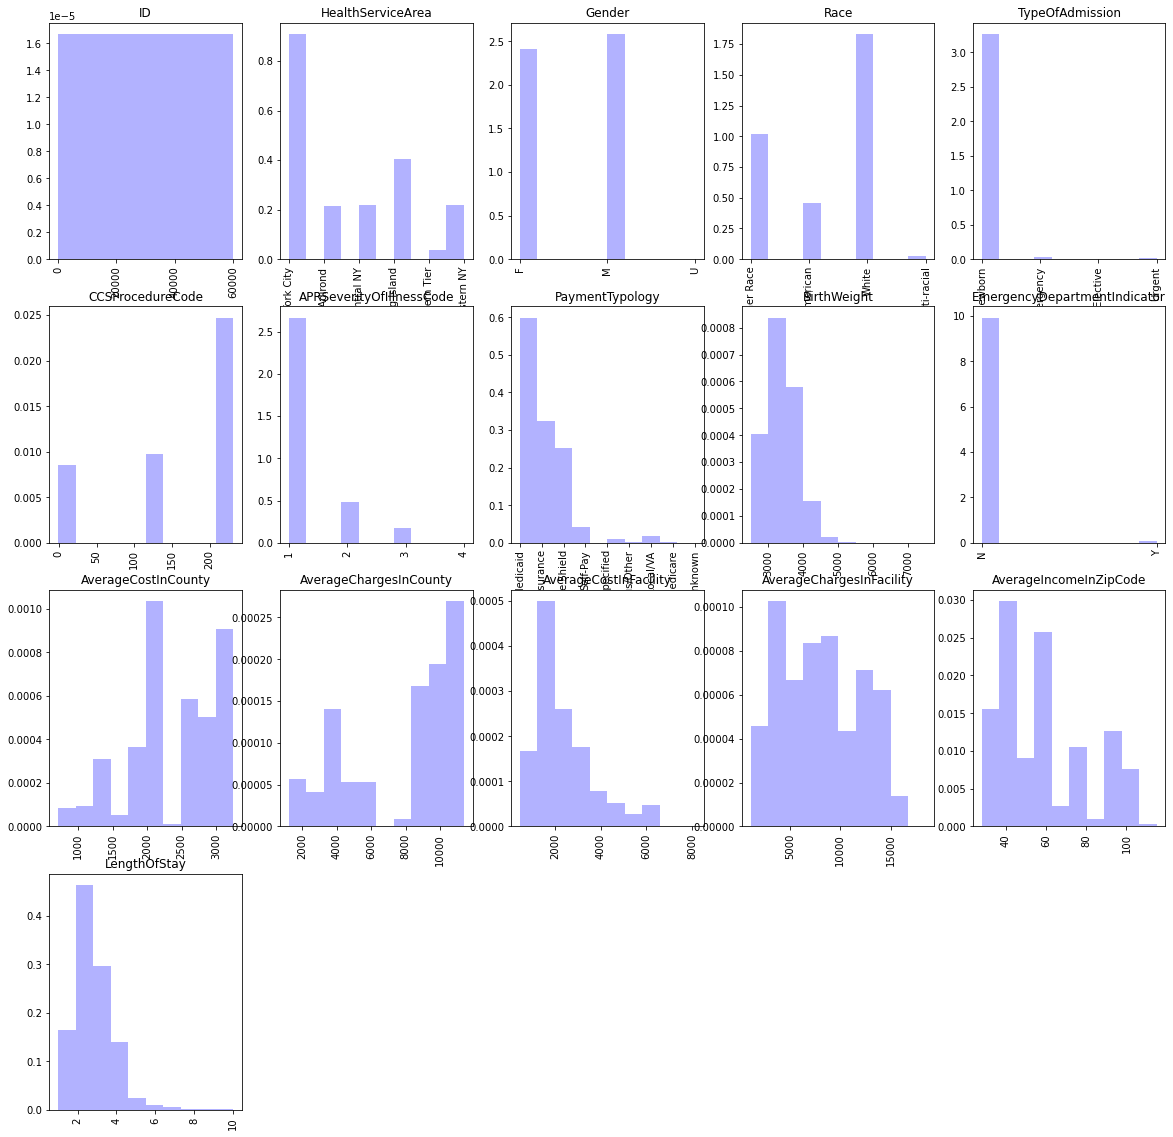

In [6]:
plt.figure(figsize=(20,20))
for i, col in enumerate(df.columns):
    plt.subplot(4,5,i+1)
    plt.hist(df[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

From the histograms plotted above we make a few observations:

We can see that the train dataset is ordered by length of stay. Using ID will cause a data leak, giving you excellent results on train data. However, this will not generalise to unseen data. Therefore, we should eliminate the ID column. 

HealthServiceArea is another column which is not useful in our prediction as it will introduce bias in our data, I am going to delete this column as well. 

CCSProcedureCode column is a categorical column which has been given as numeric and this needs to be one hot encoded with other categorical columns as our model works only with continuous variables and not categorical onees.

Gender and PaymentTypology columns have some values which are given as unknown. I do not want to retain them as unknown hence, I will replace them with the mode of their respective columns, as these columns are categorical.

Our data is not that heavily skewed hence I am not going to apply power transformation and simply go ahead with min max scaling. 

In [7]:
del df['ID']
del df['HealthServiceArea']

In [8]:
df['Gender'].replace({'U' : df['Gender'].mode().values} , inplace=True)

In [9]:
df['PaymentTypology'].replace({'Unknown' : df['PaymentTypology'].mode().values} , inplace=True)

Additionally on observing the histogram of LengthOfStay we see that this column has continuous values. Our task is to predict if a given patient (i.e.  newbornchild) will be discharged from the hospital within 3 days (class 0) or will stay in hospitalbeyond that is  4 days or more (class 1)”. In order to achieve this we need to transform the target column (“LengthOfStay”) to match the two classes mentioned in above, class 0 if LengthOfStay<4 and class 1 otherwise.

In [10]:
df['LengthOfStay'] = np.where(df['LengthOfStay']<4, 0, 1)

The describe() function in pandas is very handy in getting various summary statistics. This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [11]:
df.describe()

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,155.404229,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,0.167945
std,89.541978,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,0.373821
min,-1.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,0.000000
25%,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,0.000000
50%,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,0.000000
75%,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,0.000000
max,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,1.000000


From the above table we can observe that some columns such as APRSeverityOfIllnessCode have values ranging from 1 to 4 where as BirthWeight have values in a few thousands. From this we analyse that our numeric data needs to be scaled. 

We can also observe that the target column 'AverageLengthOfStay' is now converted to 0's and 1's as per our requirement. 

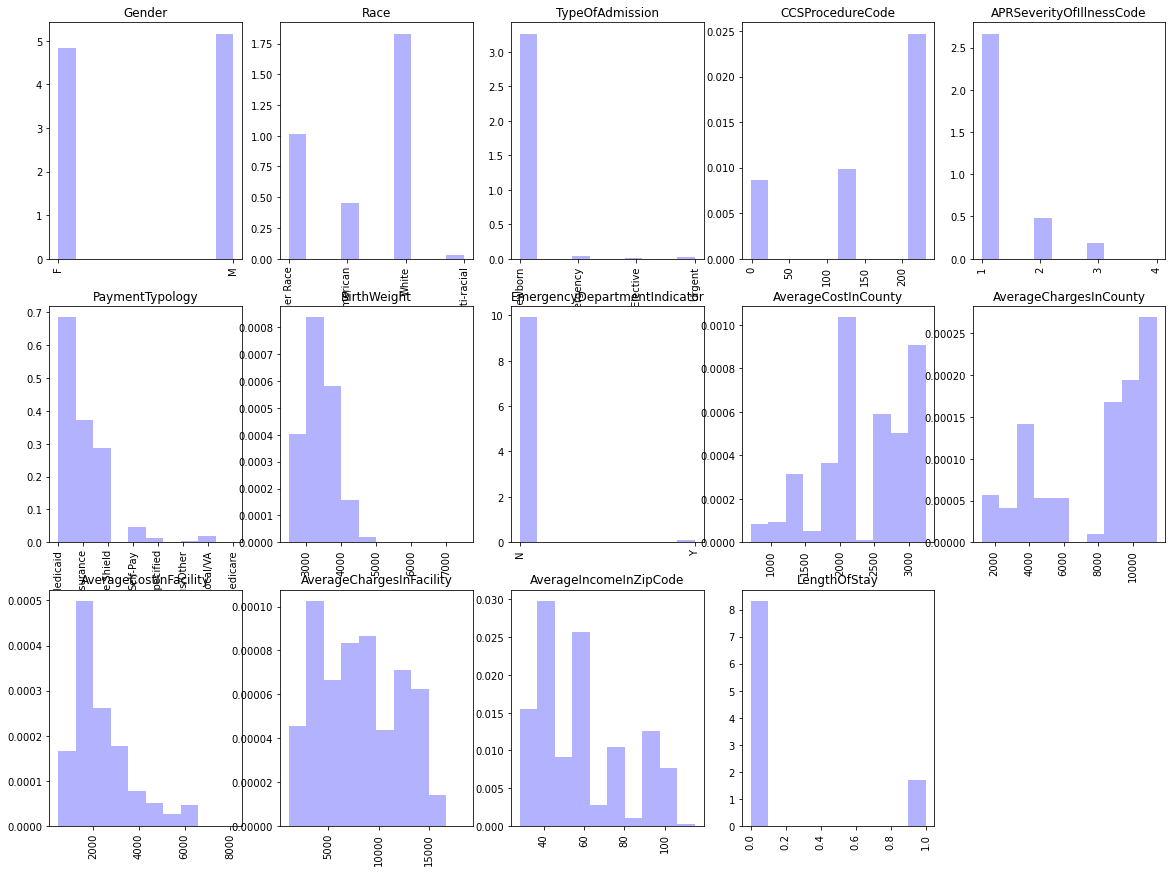

In [12]:
plt.figure(figsize=(20,20))
for i, col in enumerate(df.columns):
    plt.subplot(4,5,i+1)
    plt.hist(df[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

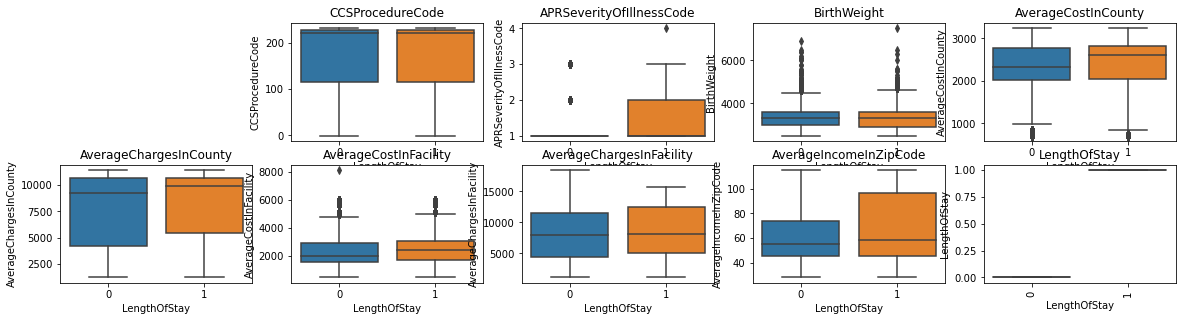

In [13]:
import seaborn as sns
plt.figure(figsize=(20,10))
i=1
for col in df.columns:
  
  if df[col].dtypes != 'object':
    plt.subplot(4,5,i+1)
    sns.boxplot(x='LengthOfStay',y=col,data=df)
    i = i+1
    plt.title(col)


plt.xticks(rotation='vertical')
plt.show()

If we have categorical attributes and continuous variables we can examine them using a boxplot. I have plotted all continuous variables against our target column.

I have done this to identify the value ranges for Length of stay 0 and 1. 
We can see that APRSeverityOfIllnessCode can be an important feature in our analysis as there is minimum to 0 overlap for classes 0 and 1. Where as CCSProcedureCode does not seem to be very usuful since almost all points overlap amongst the two classes.

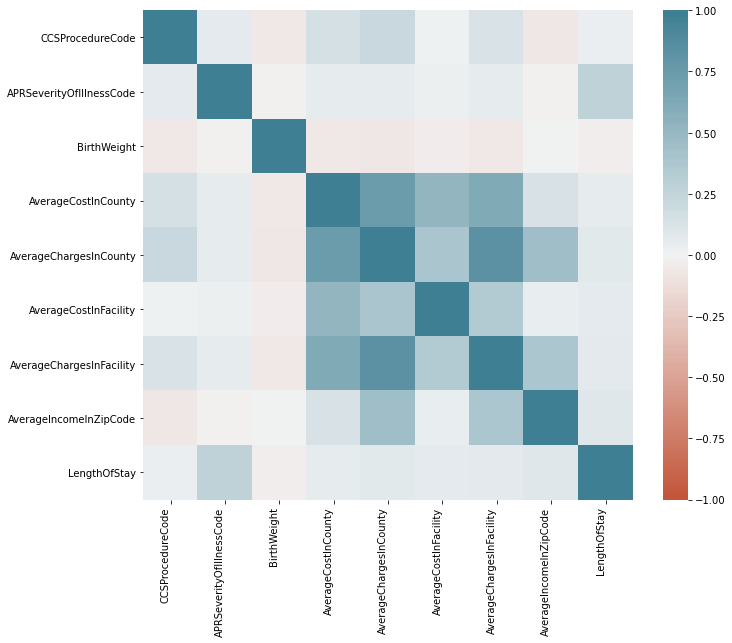

In [14]:
import seaborn as sns

f, ax = plt.subplots(figsize=(11, 9))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

Here I am using a heatmap to check how correlated our features are. We can see from the figure that AverageChargesIncountry and AverageCostInCountry are correlated. Also AverageChargesInfacility and AverageChargesInCountry are highly correlated. 

Whereas, features such as BirthWeight has a high negative correlation. 

# DATA SCALING
Many machine learning algorithms cannot work with categorical data directly. From our EDA we observe that some of the columns in our dataset are categorical Variables. These are data points that have a finite number of possible values but no numerical meaning. To deal with this issue we use a technique called One hot encoding. This method of encoding generates a new binary feature for each possible category and assigns a value of 1 to each sample's feature that corresponds to its original category.

In [15]:
from sklearn.preprocessing import OneHotEncoder

OneHotEncoder_gender = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_gender.fit(df[['Gender']])
onehot_gender = OneHotEncoder_gender.transform(df[['Gender']]).toarray()
print(onehot_gender.shape, OneHotEncoder_gender.categories_)

OneHotEncoder_TypeOfAdmission = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_TypeOfAdmission.fit(df[['TypeOfAdmission']])
onehot_TypeOfAdmission = OneHotEncoder_TypeOfAdmission.transform(df[['TypeOfAdmission']]).toarray()
print(onehot_TypeOfAdmission.shape, OneHotEncoder_TypeOfAdmission.categories_)

OneHotEncoder_Race = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_Race.fit(df[['Race']])
onehot_Race = OneHotEncoder_Race.transform(df[['Race']]).toarray()
print(onehot_Race.shape, OneHotEncoder_Race.categories_)

OneHotEncoder_PaymentTypology = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_PaymentTypology.fit(df[['PaymentTypology']])
onehot_PaymentTypology = OneHotEncoder_PaymentTypology.transform(df[['PaymentTypology']]).toarray()
print(onehot_PaymentTypology.shape, OneHotEncoder_PaymentTypology.categories_)

OneHotEncoder_EmergencyDepartmentIndicator = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_EmergencyDepartmentIndicator.fit(df[['EmergencyDepartmentIndicator']])
onehot_EmergencyDepartmentIndicator = OneHotEncoder_EmergencyDepartmentIndicator.transform(df[['EmergencyDepartmentIndicator']]).toarray()
print(onehot_EmergencyDepartmentIndicator.shape, OneHotEncoder_EmergencyDepartmentIndicator.categories_)

OneHotEncoder_CCSProcedureCode = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_CCSProcedureCode.fit(df[['CCSProcedureCode']])
onehot_CCSProcedureCode = OneHotEncoder_CCSProcedureCode.transform(df[['CCSProcedureCode']]).toarray()
print(onehot_CCSProcedureCode.shape, OneHotEncoder_CCSProcedureCode.categories_)



(59966, 2) [array(['F', 'M'], dtype=object)]
(59966, 4) [array(['Elective', 'Emergency', 'Newborn', 'Urgent'], dtype=object)]
(59966, 4) [array(['Black/African American', 'Multi-racial', 'Other Race', 'White'],
      dtype=object)]
(59966, 8) [array(['Blue Cross/Blue Shield', 'Federal/State/Local/VA',
       'Managed Care, Unspecified', 'Medicaid', 'Medicare',
       'Miscellaneous/Other', 'Private Health Insurance', 'Self-Pay'],
      dtype=object)]
(59966, 2) [array(['N', 'Y'], dtype=object)]
(59966, 7) [array([ -1,   0, 115, 216, 220, 228, 231])]


We are performing one hot encoding on the following columns: Gender, TypeOfAdmission, Race, PaymentTypology, EmergencyDepartmentIndicator and CCSProcedureCode which are all categorical features. 

In [16]:
colName1 = 'Gender'
for i in range(len(OneHotEncoder_gender.categories_[0])):
    df[colName1 + '_' + str(OneHotEncoder_gender.categories_[0][i])] = onehot_gender[:,i]
    
    
colName2 = 'Race'
for i in range(len(OneHotEncoder_Race.categories_[0])):
    df[colName2 + '_' + str(OneHotEncoder_Race.categories_[0][i])] = onehot_Race[:,i]
    
colName3 = 'TypeOfAdmission'
for i in range(len(OneHotEncoder_TypeOfAdmission.categories_[0])):
    df[colName3 + '_' + str(OneHotEncoder_TypeOfAdmission.categories_[0][i])] = onehot_TypeOfAdmission[:,i]
    
colName4 = 'PaymentTypology'
for i in range(len(OneHotEncoder_PaymentTypology.categories_[0])):
    df[colName4 + '_' + str(OneHotEncoder_PaymentTypology.categories_[0][i])] = onehot_PaymentTypology[:,i]
    
colName = 'EmergencyDepartmentIndicator'
for i in range(len(OneHotEncoder_EmergencyDepartmentIndicator.categories_[0])):
    df[colName + '_' + str(OneHotEncoder_EmergencyDepartmentIndicator.categories_[0][i])] = onehot_EmergencyDepartmentIndicator[:,i]
    
colName = 'CCSProcedureCode'
for i in range(len(OneHotEncoder_CCSProcedureCode.categories_[0])):
    df[colName + '_' + str(OneHotEncoder_CCSProcedureCode.categories_[0][i])] = onehot_CCSProcedureCode[:,i]

We now have 41 columns instead of the 16 columns which we had initially due to one hot encoding. 

In [17]:
df = df.drop(['Gender'], axis=1)
df = df.drop(['Race'], axis=1)
df = df.drop(['TypeOfAdmission'], axis=1)
df = df.drop(['PaymentTypology'], axis=1)
df = df.drop(['EmergencyDepartmentIndicator'], axis=1)
df = df.drop(['CCSProcedureCode'], axis=1)


Since we've built columns for each categorical column in our dataset, we need to get rid of the original columns to prevent duplication. Hence we are deleting the columns that have been one hot encoded.

# SETTING UP EVALUATION METRIC

The dataset we have is an imbalanced dataset with more values for class 0 when compared to class 1. Our task is to predict if a given patient (i.e.  newbornchild) will be discharged from the hospital within 3 days (class 0) or will stay in hospital beyond that, 4 days or more (class 1)”. 

We should use our dataset to create a model that can predict the target value for unknown data. This is referred to as generalisation. We should hold out some data from the training, this hold out data is called the test data and the rest is called training data.

Since I have an unbalanced dataset and want to give both groups equal weight, I'll use macro-averaged f1 score as my evaluation metric.

# BASELINE MODEL

A baseline model is one that is easy to set up and has a good chance of producing good results. Since implementations are commonly available in common packages, experimenting with them is typically fast and inexpensive.

We need to select a baseline mode to do this task. I am going to select regularised polynomial logistic regression for this example. Since a non-linear decision boundary will divide the classes as observed from the EDA, the polynomial model is justified for this. Regularisation is justified because we have some correlated attributes as observed by our heatmap given from our EDA.

# DATA SPLITTING 

##  STRATIFIED K FOLDS CROSS VALIDATION

The scikit-learn Python machine learning library provides an implementation of the train-test splitting via function train_test_split(). I will be using k folds cross validation to split my data into k folds. k-folds cross validation is one method that attempts to maximize the use of the available data for training and then testing a model. 

In [18]:
from sklearn.model_selection import train_test_split

with pd.option_context('mode.chained_assignment', None):
    train_data_, test_data = train_test_split(df, test_size=0.2, 
                                              shuffle=True,random_state=0, stratify = df['LengthOfStay'])
    
print(train_data_.shape[0], test_data.shape[0])

47972 11994


Let's convert the data to np array

In [19]:
#without scaling numerical columns seperate
train_X = train_data_.drop(['LengthOfStay',], axis=1).to_numpy()
train_y = train_data_[['LengthOfStay']].to_numpy()

test_X = test_data.drop(['LengthOfStay',], axis=1).to_numpy()
test_y = test_data[['LengthOfStay']].to_numpy()


Function to get the performance. We are using f1 score 

In [21]:
from sklearn.metrics import f1_score

def get_f1_scores(clf, train_X, train_y, test_X, test_y):
    train_pred = clf.predict(train_X)
    test_pred = clf.predict(test_X)
    
    train_f1 = f1_score(train_y, train_pred, average='macro')
    test_f1 = f1_score(test_y, test_pred, average='macro')
    
    return train_f1, test_f1

Since a non-linear decision boundary will divide the classes as observed from the EDA, the polynomial model is justified for this. Ploynomial features increases the complexity of our model which helps in increasing the performace of our model. I have used a polynomial degree of 2 here. Though the data is not seperable in 2 D it will be sepebrable on the multi-dimential scale. Hence I will be using polynomial features.

In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly.fit(train_X)
train_X = poly.transform(train_X)
test_X = poly.transform(test_X)

It's important to scale polynomial features when we work with them. We apply a minmax normalisation to the data which scales our data.

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

# MODEL -1 
## LOGISTIC REGRESSION

A Machine Learning classification algorithm called logistic regression is used to estimate the likelihood of a categorical dependent variable. The dependent variable in logistic regression is a binary variable that includes data coded as 1 or 0.
Our task is to predict LengthOfStay which is a categorical column one hot encoded into a binary variable we will be building a logistic regression model to seehow well it can help us in achieving our goal.

I am using l2 because I want to reduce the weight of variables that don't contribute as much to my target variable.
By using class_weight = 'balanced' we are giving equal weightage to both the models. Here we determine the best lamda value and get the split that has the closest performance value to the mean performance.
Here I am applying cross validation with 10 folds and max_iter = 100. 

In [24]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.linear_model import LogisticRegression



f1_scorer = make_scorer(f1_score, average='weighted')
lambda_paras = np.logspace(-10, 2, num=5)

cv_results = dict()

for lambda_para in lambda_paras:
    clf = LogisticRegression(penalty='l2', C = 1.0/lambda_para, 
                             solver='liblinear', max_iter=100, 
                             class_weight='balanced')
    
    scores = cross_validate(clf, train_X, train_y.ravel(), 
                            scoring=f1_scorer, return_estimator=True,
                            return_train_score=True, cv=5)
    
    cv_results[lambda_para] = scores

Let's plot the reults now.

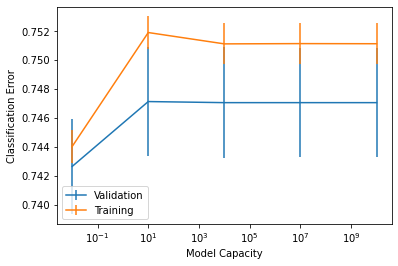

In [25]:
fig, ax = plt.subplots()

val_means = [np.mean(cv_results[lambda_para]['test_score']) 
             for lambda_para in lambda_paras]

val_std = [np.std(cv_results[lambda_para]['test_score']) 
           for lambda_para in lambda_paras]

train_means = [np.mean(cv_results[lambda_para]['train_score']) 
               for lambda_para in lambda_paras]

train_std = [np.std(cv_results[lambda_para]['train_score']) 
             for lambda_para in lambda_paras]

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            val_means,
            yerr=val_std)

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            train_means,
            yerr=train_std)

plt.xscale("log")
plt.ylabel('Classification Error')
plt.xlabel('Model Capacity')
plt.legend(['Validation','Training',])
plt.show()


In [26]:
best_lambda = 0.1   # best lambda according to the above figure

# get the split that has the closest performance value to the mean performance
best_classifier_inx = np.argmin(np.abs(cv_results[0.1 ]['test_score'] - np.mean(cv_results[0.1 ]['test_score'])))

clf = cv_results[0.1 ]['estimator'][best_classifier_inx]

From the above figure we have to pick the best lamda value. From our graph we see that our value is somewhere close to 0.1, hence we pick lamda = 0.1.

## TESTING THE HYPOTHESIS

We now put our hypothesis (or model) to the test to see whether it can generalise to new data. This is where we use our test data. I am going to see the classification report here to check our evaluation metric which we had decided earlier, macro average and f-1 score.

In [27]:
from sklearn.metrics import classification_report
test_pred = clf.predict(test_X)
    
print(classification_report(test_y, test_pred, target_names=[str(i) for i in range(0,2)]))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9980
           1       0.32      0.62      0.42      2014

    accuracy                           0.71     11994
   macro avg       0.61      0.67      0.61     11994
weighted avg       0.81      0.71      0.74     11994



## SUMMARY

The results obtained from the test data of logistic regression we have achieved a macro average of 0.62 with an f1-score for class 0 - 0.81 and class 1- 0.44. However, the performance our model has given us is not that great. 

This is the best we could achieve from this model and from the data given. We are far from our goal, hence, we now move onto a different model which is decision Tree. 

# MODEL - 2
## Decision Trees

Decision Trees are a form of Supervised Machine Learning in which the data is continuously split according to a parameter, you describe what the input is and what the corresponding output is in the training data. As our base model logistic regression did not perform well I will be using decision trees as my next model.  Our dataset has both numerical and categorical values of which the categorical columns have been one hot encoded and transformed into continuous values. This data works well with decision trees.I have taken the  tree_max_depth as 3. 

In [51]:
#without scaling numerical columns seperate
train_X = train_data_.drop(['LengthOfStay',], axis=1).to_numpy()
train_y = train_data_[['LengthOfStay']].to_numpy()

test_X = test_data.drop(['LengthOfStay',], axis=1).to_numpy()
test_y = test_data[['LengthOfStay']].to_numpy()


In [52]:
from sklearn.metrics import f1_score

def get_f1_scores(clf, train_X, train_y, test_X, test_y):
    train_pred = clf.predict(train_X)
    test_pred = clf.predict(test_X)
    
    train_f1 = f1_score(train_y, train_pred, average='macro')
    test_f1 = f1_score(test_y, test_pred, average='macro')
    
    return train_f1, test_f1

In [59]:
from sklearn import tree

tree_max_depth = 10  #change this value and observe

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=tree_max_depth, class_weight='balanced')
clf = clf.fit(train_X, train_y)

In [60]:
train_acc, val_acc = get_f1_scores(clf, train_X, train_y, test_X, test_y)
print("Train f-1 score: {:.3f}".format(train_acc))
print("Test f-1 score: {:.3f}".format(val_acc))

Train f-1 score: 0.655
Test f-1 score: 0.629


In [ ]:
from sklearn.metrics import classification_report
test_pred = clf.predict(test_X)
    
print(classification_report(test_y, test_pred, target_names=[str(i) for i in range(0,2)]))

We see that we have not achieved the desired f1 score, however there is no overfitting.
We can tune the hyper parameters of the decision tree to get the best performance. Sklearn has a function called GridSearchCV that does cross validation to tune the hyper parameters.

## Hyper-parameter tuning

We do not want to have a tree with all pure leaf nodes of course. It would be too specific and likely to overfit. From the above values of train and test score we see that there is overfitting taking place. By tuning the hyper parameters of a decision tree we can get the best performance. I have chosen max_depth, min_samples_split as the hyper parameters here.

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

parameters = {'max_depth':np.arange(20,400,100), 'min_samples_split':np.arange(2,50,5), 'criterion': ['gini', 'entropy']}

dt_clf = tree.DecisionTreeClassifier(criterion='entropy', class_weight='balanced')
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
Gridclf = GridSearchCV(dt_clf, parameters, scoring='f1_macro', cv = cv)
Gridclf.fit(train_X, train_y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='entropy'),
             param_grid={'max_depth': array([  2,  52, 102, 152, 202, 252, 302, 352]),
                         'min_samples_split': array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47])},
             scoring='f1_macro')

In [62]:
pd.DataFrame(Gridclf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.033631,0.003730,0.001456,0.000226,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.525501,0.519344,0.527057,0.521586,0.521522,0.532174,0.528405,0.523365,0.523821,0.524649,0.524742,0.003561,71
1,0.033596,0.001532,0.001509,0.000234,2,7,"{'max_depth': 2, 'min_samples_split': 7}",0.525501,0.519344,0.527057,0.521586,0.521522,0.532174,0.528405,0.523365,0.523821,0.524649,0.524742,0.003561,71
2,0.033609,0.002215,0.001433,0.000115,2,12,"{'max_depth': 2, 'min_samples_split': 12}",0.525501,0.519344,0.527057,0.521586,0.521522,0.532174,0.528405,0.523365,0.523821,0.524649,0.524742,0.003561,71
3,0.033987,0.001250,0.001511,0.000078,2,17,"{'max_depth': 2, 'min_samples_split': 17}",0.525501,0.519344,0.527057,0.521586,0.521522,0.532174,0.528405,0.523365,0.523821,0.524649,0.524742,0.003561,71
4,0.034942,0.001645,0.001542,0.000111,2,22,"{'max_depth': 2, 'min_samples_split': 22}",0.525501,0.519344,0.527057,0.521586,0.521522,0.532174,0.528405,0.523365,0.523821,0.524649,0.524742,0.003561,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.156723,0.004918,0.002047,0.000109,352,27,"{'max_depth': 352, 'min_samples_split': 27}",0.591155,0.587423,0.577126,0.594692,0.580335,0.591990,0.583828,0.581754,0.583397,0.588679,0.586038,0.005362,29
76,0.155117,0.002646,0.001996,0.000089,352,32,"{'max_depth': 352, 'min_samples_split': 32}",0.589910,0.589301,0.582750,0.593883,0.584303,0.594135,0.581240,0.578794,0.591026,0.586876,0.587222,0.005036,25
77,0.152878,0.002224,0.001993,0.000051,352,37,"{'max_depth': 352, 'min_samples_split': 37}",0.591996,0.593885,0.584103,0.597257,0.588440,0.599644,0.580215,0.584266,0.589115,0.589833,0.589875,0.005755,21
78,0.156200,0.004453,0.002109,0.000108,352,42,"{'max_depth': 352, 'min_samples_split': 42}",0.592047,0.594379,0.587210,0.599068,0.584519,0.599717,0.581238,0.586390,0.593173,0.588636,0.590638,0.005792,10


In [63]:
print(Gridclf.best_score_)
print(Gridclf.best_params_)

clf = Gridclf.best_estimator_

0.5936353942099312
{'max_depth': 352, 'min_samples_split': 47}


In [64]:
train_acc, val_acc = get_f1_scores(clf,train_X, train_y, test_X, test_y)
print("Train f1 score: {:.3f}".format(train_acc))
print("Test f1 score: {:.3f}".format(val_acc))

Train f1 score: 0.677
Test f1 score: 0.593


After hyper parameters tuning we can see that there is still overfitting taking place which can be overcome by a process called post pruning.

## Post pruning

Cost-complexity ratio should be as low as possible. Pruning is an algorithm for avoiding over-fitting in a tree. This algorithm identifies the node with the "weakest connection," as determined by the effective alpha. Then, starting with the nodes with the smallest effective alpha, they're pruned first. This is a post-pruning method, as the algorithm operates after the tree has evolved.

The cost complexity parameter, ccp alpha, controls this pruning technique. The number of nodes pruned increases as ccp alpha increases. Minimal cost complexity Pruning seeks the node with the "weakest relation" recursively. The effective alpha of the weakest connection is measured, and the nodes with the smallest effective alpha are pruned first.

In [65]:
clf = tree.DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(train_X, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [66]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha= ccp_alpha)
    clf.fit(train_X, train_y)
    clfs.append(clf)

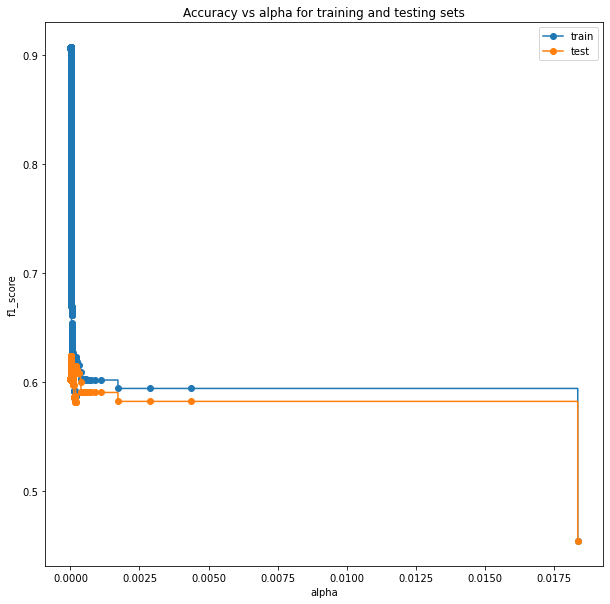

In [67]:
train_scores = [f1_score(train_y, clf.predict(train_X), average='macro') for clf in clfs]
test_scores = [f1_score(test_y, clf.predict(test_X), average='macro') for clf in clfs]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("f1_score")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

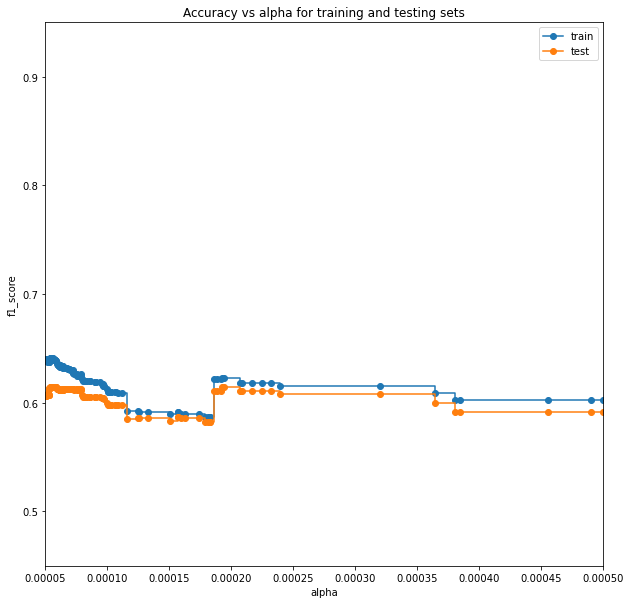

In [68]:
train_scores = [f1_score(train_y, clf.predict(train_X), average='macro') for clf in clfs]
test_scores = [f1_score(test_y, clf.predict(test_X), average='macro') for clf in clfs]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("f1_score")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.set_xlim(left= 0.00005,right=0.0005)
ax.set_ylim(bottom=0.45,top=0.95)
ax.legend()
plt.show()

From the above figure we see that the alpha value is 0.00022, that is where our variance and bias is low. This is the point where our blue and orance dots are closest to each other. We pass this alpha value to our decision tree classifier.

In [71]:
clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=0.00022, class_weight='balanced')
clf.fit(train_X, train_y)
train_acc, test_acc = get_f1_scores(clf,train_X, train_y, test_X, test_y)
print("Train f1 score: {:.3f}".format(train_acc))
print("Test f1 score: {:.3f}".format(test_acc))

Train f1 score: 0.625
Test f1 score: 0.622


We see that overfitting still exists but it is small. As per our chosen performance metric macro average we see that we have still not reached our goal.

## TESTING HYPOTHESIS

In [72]:
from sklearn.metrics import classification_report
test_pred = clf.predict(test_X)
    
print(classification_report(test_y, test_pred, target_names=[str(i) for i in range(0,2)]))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      9980
           1       0.32      0.69      0.44      2014

    accuracy                           0.71     11994
   macro avg       0.62      0.70      0.62     11994
weighted avg       0.82      0.71      0.74     11994



## SUMMARY

The value macro average obtained before hyper parameter tuning is 0.62. However, the results obtained from the test set shows that the f1-score of class 0 is 0.80 and class 1 is 0.44, with the macro average of 0.62. The performance has not improved as it can be seen even after applying hyper parameter tuning and minimal cost complexity. Hence I will be moving to the next model with the hope that it gives me a better performance. I will be using Random Forest as my next model.

# MODEL 3
## RANDOM FOREST CLASSIFIER

Since decision tree did not work well on our data I am using Random forest as my 3rd model and aim to get a desirable performance. 

Random forest is a learning algorithm that is supervised. It creates a "forest" out of an ensemble of decision trees, which are normally trained using the "bagging" process. The bagging method's basic premise is that combining different learning models improves the overall outcome. 

I am using the max_depth as 12 and n_estimator as 500. Class weight is kept balanced as I want to give equal importance to both my classes. 


In [74]:
train_X = train_data_.drop(['LengthOfStay',], axis=1).to_numpy()
train_y = train_data_[['LengthOfStay']].to_numpy()

test_X = test_data.drop(['LengthOfStay',], axis=1).to_numpy()
test_y = test_data[['LengthOfStay']].to_numpy()

In [75]:
from sklearn.metrics import f1_score

def get_f1_scores(clf, train_X, train_y, test_X, test_y):
    train_pred = clf.predict(train_X)
    test_pred = clf.predict(test_X)
    
    train_f1 = f1_score(train_y, train_pred, average='macro')
    test_f1 = f1_score(test_y, test_pred, average='macro')
    
    return train_f1, test_f1

In [76]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=12, n_estimators=500, class_weight='balanced', random_state=0)
clf.fit(train_X, train_y)

<ipython-input-76-72c31f3c6f82>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_X, train_y)


RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=500,
                       random_state=0)

In [77]:
train_acc, val_acc = get_f1_scores(clf, train_X, train_y, test_X, test_y)
print("Train f-1 score: {:.3f}".format(train_acc))
print("Test f-1 score: {:.3f}".format(val_acc))

Train f-1 score: 0.678
Test f-1 score: 0.645


In [78]:
from sklearn.metrics import classification_report
test_pred = clf.predict(test_X)
    
print(classification_report(test_y, test_pred, target_names=[str(i) for i in range(0,2)]))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      9980
           1       0.36      0.63      0.46      2014

    accuracy                           0.75     11994
   macro avg       0.63      0.70      0.65     11994
weighted avg       0.82      0.75      0.77     11994



The macro average obtained from our basic random forest classifier is 0.65 where as the for train data it is 0.68. There seems to be overfitting. We can eliminate this by tuning our hyper parameters. We use Grid searchCV which will give us the best parameters. We then fit these on our data.

In [79]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestClassifier(criterion='entropy', class_weight='balanced')
Gridclf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, scoring='f1_macro')
Gridclf.fit(train_X, train_y)

/Users/shehzahussain/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/shehzahussain/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/shehzahussain/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/shehzahussain/opt/anaconda3/lib/python3.8/site-packages/sklearn

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy'),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='f1_macro')

In [117]:
print(Gridclf.best_score_)
print(Gridclf.best_params_)

clf = Gridclf.best_estimator_

0.6544794354306035
{'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}


In [118]:
train_acc, test_acc = get_f1_scores(clf,train_X, train_y, test_X, test_y)
print("Train f1 score: {:.3f}".format(train_acc))
print("Test f1 score: {:.3f}".format(test_acc))

Train f1 score: 0.739
Test f1 score: 0.654


In [119]:
from sklearn.metrics import classification_report

test_pred = clf.predict(test_X)
    
print(classification_report(test_y, test_pred,))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      9980
           1       0.38      0.58      0.46      2014

    accuracy                           0.77     11994
   macro avg       0.64      0.69      0.65     11994
weighted avg       0.82      0.77      0.79     11994



## Unseen test data

In [146]:
df_test = pd.read_csv('test_data.csv', delimiter=',')

In [147]:
del df_test['ID']
del df_test['HealthServiceArea']

In [148]:
df_test['Gender'].replace({'U' : df_test['Gender'].mode().values} , inplace=True)

In [149]:
df_test['PaymentTypology'].replace({'Unknown' : df_test['PaymentTypology'].mode().values} , inplace=True)

In [150]:
from sklearn.preprocessing import OneHotEncoder


onehot_gender = OneHotEncoder_gender.transform(df_test[['Gender']]).toarray()
print(onehot_gender.shape, OneHotEncoder_gender.categories_)


onehot_TypeOfAdmission = OneHotEncoder_TypeOfAdmission.transform(df_test[['TypeOfAdmission']]).toarray()
print(onehot_TypeOfAdmission.shape, OneHotEncoder_TypeOfAdmission.categories_)


onehot_Race = OneHotEncoder_Race.transform(df_test[['Race']]).toarray()
print(onehot_Race.shape, OneHotEncoder_Race.categories_)


onehot_PaymentTypology = OneHotEncoder_PaymentTypology.transform(df_test[['PaymentTypology']]).toarray()
print(onehot_PaymentTypology.shape, OneHotEncoder_PaymentTypology.categories_)


onehot_EmergencyDepartmentIndicator = OneHotEncoder_EmergencyDepartmentIndicator.transform(df_test[['EmergencyDepartmentIndicator']]).toarray()
print(onehot_EmergencyDepartmentIndicator.shape, OneHotEncoder_EmergencyDepartmentIndicator.categories_)


onehot_CCSProcedureCode = OneHotEncoder_CCSProcedureCode.transform(df_test[['CCSProcedureCode']]).toarray()
print(onehot_CCSProcedureCode.shape, OneHotEncoder_CCSProcedureCode.categories_)



(69177, 2) [array(['F', 'M'], dtype=object)]
(69177, 4) [array(['Elective', 'Emergency', 'Newborn', 'Urgent'], dtype=object)]
(69177, 4) [array(['Black/African American', 'Multi-racial', 'Other Race', 'White'],
      dtype=object)]
(69177, 8) [array(['Blue Cross/Blue Shield', 'Federal/State/Local/VA',
       'Managed Care, Unspecified', 'Medicaid', 'Medicare',
       'Miscellaneous/Other', 'Private Health Insurance', 'Self-Pay'],
      dtype=object)]
(69177, 2) [array(['N', 'Y'], dtype=object)]
(69177, 7) [array([ -1,   0, 115, 216, 220, 228, 231])]


In [151]:
colName1 = 'Gender'
for i in range(len(OneHotEncoder_gender.categories_[0])):
    df_test[colName1 + '_' + str(OneHotEncoder_gender.categories_[0][i])] = onehot_gender[:,i]
    
    
colName2 = 'Race'
for i in range(len(OneHotEncoder_Race.categories_[0])):
    df_test[colName2 + '_' + str(OneHotEncoder_Race.categories_[0][i])] = onehot_Race[:,i]
    
colName3 = 'TypeOfAdmission'
for i in range(len(OneHotEncoder_TypeOfAdmission.categories_[0])):
    df_test[colName3 + '_' + str(OneHotEncoder_TypeOfAdmission.categories_[0][i])] = onehot_TypeOfAdmission[:,i]
    
colName4 = 'PaymentTypology'
for i in range(len(OneHotEncoder_PaymentTypology.categories_[0])):
    df_test[colName4 + '_' + str(OneHotEncoder_PaymentTypology.categories_[0][i])] = onehot_PaymentTypology[:,i]
    
colName = 'EmergencyDepartmentIndicator'
for i in range(len(OneHotEncoder_EmergencyDepartmentIndicator.categories_[0])):
    df_test[colName + '_' + str(OneHotEncoder_EmergencyDepartmentIndicator.categories_[0][i])] = onehot_EmergencyDepartmentIndicator[:,i]
    
colName = 'CCSProcedureCode'
for i in range(len(OneHotEncoder_CCSProcedureCode.categories_[0])):
    df_test[colName + '_' + str(OneHotEncoder_CCSProcedureCode.categories_[0][i])] = onehot_CCSProcedureCode[:,i]

In [152]:
df_test = df_test.drop(['Gender'], axis=1)
df_test = df_test.drop(['Race'], axis=1)
df_test = df_test.drop(['TypeOfAdmission'], axis=1)
df_test = df_test.drop(['PaymentTypology'], axis=1)
df_test = df_test.drop(['EmergencyDepartmentIndicator'], axis=1)
df_test = df_test.drop(['CCSProcedureCode'], axis=1)

In [166]:
test_pred = clf.predict(df_test)

In [167]:
test_pred

array([1, 0, 0, ..., 0, 0, 0])

In [168]:
predictions= pd.read_csv('s3811947_predictions.csv')

In [169]:
predictions

,ID,LengthOfStay
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
69172,69173,0
69173,69174,0
69174,69175,0
69175,69176,0


In [171]:
predictions['LengthOfStay'] = test_pred 
predictions.head()

,ID,LengthOfStay
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0


In [174]:
predictions.to_csv('s3811947_predictions.csv', index = False)

## ULTIMATE JUDGEMENT AND ANALYSIS

My optimal hypothesis would be Random Forest.

As I am focussing on f1-scores and we can clearly see that we have achieved a macro average of 0.66 which is almost 66%. This is the best we can achieve on this data, hence I am going for this model as my final model. The macro average for Random forest is highest when comapred to the macro averages of my other two models (logistic regression, decision trees), hence I am choosing random forest as my optimal hypothesis.

## LIMITATIONS OF THE MODEL

1. This model only predits upto 66% accurate results.
2. The model seems to overfit.


